1. Suppose we are given two $n$-element sorted sequences $A$ and $B$ each with distinct elements, but potentially some elements that are in both sequences. Describe an $O(n)$-time method for computing a sequence representing the union
 (with no duplicates) as a sorted sequence.

In [ ]:
def union_sorted_sequences(A, B):
    #TODO: implement this function
    i = 0 # pointer for sequence A
    j = 0 # pointer for sequence B

    union = []  # initialize empty list to store the union of A and B

    ''' iterate through both sequences until pointers reach end of each one '''
    while i < len(A) or j < len(B): # iterates until pointers have reached end of A and B
      if j == len(B) or (i < len(A) and A[i] < B[j]): # if pointer j has reached the end of sequence B or the element at A[i] is smaller than element at B[j]
        ''' append element from A to the union '''
        if not union or A[i] != union[-1]:  # if union list is empty or current element of A is different from the last element in the union list
          union.append(A[i])  # append the current element of A the union list
        i += 1  # move pointer i to the next element in sequence A
      elif i == len(A) or (j < len(B) and A[i] > B[j]): # if pointer i has reached end of sequence A or the element B[j] is smaller than element at A[i]
        ''' append element from B to the union '''
        if not union or B[j] != union[-1]:  # if union list is empty or the current element of B is different from last element in the union list
          union.append(B[j])  # append the current element of B to the union list
        j += 1  # move pointer j to the next element in sequence B
      else: # if elements at positions i in A and j in B are equal
        ''' append one of the equal elements to the union '''
        if not union or A[i] != union[-1]:  # if the union list is empty or the current element of A is different from the last element in the union list
          union.append(A[i])  # append the current element of A to the union list
        i += 1  # move pointer i to the next element in A
        j += 1  # move pointer j to the next element in B

    return union  # return the sorted union of sequences A and B

In [ ]:
# Test code
A = [0, 1, 3, 5, 7, 9]
B = [0, 2, 4, 6, 8, 9]
C = union_sorted_sequences(A, B)
print(C)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


2. Given a sequence $S$ of $n$ values, each equal to 0 or 1, implement an in-place method for sorting $S$ with an $O(n)$ time complexity.

In [ ]:
def sort_binary_sequence(S):
    #TODO: implement this function
    left = 0  # initialize left pointer at the beginning of the sequence
    right = len(S) - 1  # initialize right pointer at the end of the sequence

    ''' makes sure left pointer crosses or reaches right pointer '''
    ''' makes sure all 0s are on the left side of sequence and all 1s are on the right side '''
    while left < right: # iterates until left pointer crosses or reaches right pointer
      while S[left] == 0 and left < right:  # moves left pointer until it points to a 1 or until it crosses the right pointer
        left +=1                            # ensures that the left pointer stops at the first occurrence of 1 encountered from the left side of sequence

      while S[right] == 1 and left < right: # moves right pointer until it points to 0 or until it crosses the left pointer
        right -= 1                          # ensures that right pointer stops at first occurrence of 0 encountered from right side of sequence
      ''' checks left pointer is still left of right pointer '''
      if left < right:  # swaps of left pointer is still left of right pointer
        S[left], S[right] = S[right], S[left] # swap elements at left and right pointers
        left += 1 # move left pointer to the right
        right -= 1  # move right pointer to the left
    return S  # return sorted sequence

In [ ]:
# Test code
test_sequences = [
    [0, 1, 0, 1, 1, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 1, 0, 1]
]

sorted_sequences = [sort_binary_sequence(seq) for seq in test_sequences]
print(sorted_sequences)

[[0, 0, 0, 0, 1, 1, 1, 1], [0, 0, 0, 0, 1, 1, 1, 1], [0, 0, 0, 0, 1, 1, 1, 1], [0, 0, 0, 0, 1, 1, 1, 1], [0, 0, 0, 0, 1, 1, 1, 1]]


3. Suppose we are given an $n$-element sequence $S$ such that each element in
 represents a different vote for president, where each vote is given as an integer representing a particular candidate, yet the integers may be arbitrarily large (even if the number of candidates is not). Design an $O(n\log n)$-time algorithm to see who wins the election $S$ represents, assuming the candidate with the most votes wins.

In [ ]:
def find_election_winner(S):
    #TODO: implement this function
    countVotes = {} # creates dictionary storing count of votes for each candidate

    for vote in S:  # iterates through votes and count and votes for each candidate
      if vote in countVotes:  # if candidate's vote already in dictionary
        countVotes[vote] += 1 # increment count
      else:
        countVotes[vote] = 1  # intiailize count to 1 if candidate's vote is not in the dictionary

    winner = max(countVotes, key=countVotes.get)  # find candidate with the maximum number of votes

    votesReceived = countVotes[winner]  # get number of votes received by the winner

    return winner, votesReceived  # return winner and the number of votes received by winner


In [ ]:
# Test code
votes = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 5]
winner, votes_received = find_election_winner(votes)
print(winner, votes_received) # shoud output 5 4

5 4


4. Consider the voting problem above, but now suppose the integers $1$
 to $k$ are used to identify $k<n$ candidates. Design an $O(n)$-time algorithm to determine who wins the election.

In [ ]:
def find_election_winner2(S, k):
    #TODO: implement this function
    countVotes = [0] * (k + 1)  # initializes an array to store the count of votes for each candidate
                                # index 0 is not used, so k + 1 elements

    for vote in S:  # iterate through votes
      countVotes[vote] += 1 # count votes for each candidate

    ''' initializes variables to keep track of the candidate with the maximum votes and the maximum votes count '''
    maxVotes = 0  # variable to store max votes count
    winner = 0  # variable to store candidate with max votes
    for candidate in range(1, k + 1): # iterate through each candidate to find the one with the max votes
      if countVotes[candidate] > maxVotes:  # checks if current candidate has more votes than current max
        maxVotes = countVotes[candidate]  # updates max votes count and the winning candidate
        winner = candidate

    return winner, maxVotes # returns winning candidate and max votes count

In [ ]:
# Sample sequence of votes and number of candidates
S = [1, 3, 2, 3, 4, 3, 2, 1, 3, 3, 2]
k = 4  # Number of candidates

# Test the algorithm
print(find_election_winner2(S, k)) # should output 3 5

(3, 5)


5. Given an array $A$ of $n$ integers in the range $[0, n^2-1]$, describe a simple method for sorting $A$ in $O(n)$ time.

In [ ]:
def radix_sort(arr, n):
    #TODO: implement this function
    ''' define inner function for counting sort '''
    def countingSort(arr, exp): # initialize variables
      n = len(arr)  # length of array
      output = [0] * n  # output array to store sorted elements
      count = [0] * 10  # count array for digits 0 to 9

      for i in range(n):  # count occurrences of digits at position exp
        index = arr[i] // exp # calculates index based on current exponent
        count[index % 10] += 1  # increments count for the corresponding digit

      for i in range(1, 10):  # updates count array to store the actual position of digits
        count[i] += count[i - 1]

      i = n - 1 # build output array
      while i >= 0:
        index = arr[i] // exp # calculates index based on current exponent
        output[count[index % 10] - 1] = arr[i]  # places element at its correct position in output array
        count[index % 10] -= 1  # decrements the count for the corresponding digit
        i -= 1

      for i in range(n):  # copy sorted elements to the original array
        arr[i] = output[i]

    maxElement = max(arr) # find max element in the array
    exp = 1 # initializes exponent for least significant digit
    while maxElement // exp > 0:  # performs counting sort for every digit, dtarting from least significant digit
      countingSort(arr, exp)  # call countingSort function for the current exponent
      exp *= 10 # moves to the next significant digit


In [ ]:
# Test code

n = 10  # Example n
arr = [9, 18, 72, 23, 0, 94, 40, 12, 59, 83]
print("Original array:", arr)
radix_sort(arr, n)
print("Sorted array:", arr)

Original array: [9, 18, 72, 23, 0, 94, 40, 12, 59, 83]
Sorted array: [0, 9, 12, 18, 23, 40, 59, 72, 83, 94]


6. Given $n$ points on a 2D plane where points[i] = [$x_i$, $y_i$], Return the widest vertical area between two points such that no points are inside the area.

  A vertical area is an area of fixed-width extending infinitely along the y-axis (i.e., infinite height). The widest vertical area is the one with the maximum width.

  Note that points on the edge of a vertical area are not considered included in the area.

  **Example 1**:

  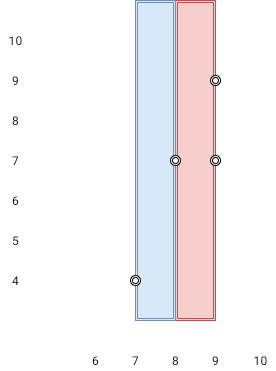

  Input: points = [[8,7],[9,9],[7,4],[9,7]]

  Output: 1

  Explanation: Both the red and the blue area are optimal.

  **Example 2**:

  Input: points = [[3,1],[9,0],[1,0],[1,4],[5,3],[8,8]]

  Output: 3

In [ ]:
def maxWidthOfVerticalArea(points):
    #TODO: implement this function
    points.sort() # sorts the points based on their x-coordinates
    maxWidth = 0  # initializes the max width to 0

    for i in range(1, len(points)): # iterates through sorted points and calculates max width
      width = points[i][0] - points[i-1][0] # calculates width between two consecutive x-coordinates
      maxWidth = max(maxWidth, width) # updates max width if the current width is greater
    return maxWidth # return max width

In [ ]:
# Test the function with the given examples
test_cases = [
    ([[8,7],[9,9],[7,4],[9,7]], 1),
    ([[3,1],[9,0],[1,0],[1,4],[5,3],[8,8]], 3)
]

results = [maxWidthOfVerticalArea(tc[0]) == tc[1] for tc in test_cases]
print(results)

[True, True]


7. Given an unsorted sequence $S$ of $n$ comparable elements, and an integer $k$, give an $O(n\log k)$ expected-time algorithm for finding the $O(k)$ elements that have rank $\lceil n/k\rceil$, $\lceil 2n/k\rceil$, $\lceil 3n/k\rceil$, and so on.

In [ ]:
def find_elements_with_rank(lst, k):
    """
    Find elements that have rank n/k, 2n/k, 3n/k, ...
    """
    #TODO: implement this function
    n = len(lst)  # get length of input list
    rankElements = [] # initializes an empty list to store elements with desired ranks

    ''' define partition function for quickselect '''
    def partition(arr, low, high):
      pivot = arr[high] # choose pivot element as the last element of the array
      i = low - 1
      for j in range(low, high):  # iterate thru the array from low to high - 1
        if arr[j] <= pivot: # if current element is less than or equal to pivot
          i += 1
          arr[i], arr[j] = arr[j], arr[i] # swap it with element at index i
      arr[i + 1], arr[high] = arr[high], arr[i + 1] # sq+wap pivot element with element at index i + 1
      return i + 1

    ''' define function for finding element with a given rank '''
    def quickSelect(arr, low, high, k):
      if low >= high: # if low is greater than high
        return arr[low]  # array is empty or has only one element
      pivot_index = partition(arr, low, high) # partition array and get pivot index
      if pivot_index == k:  # if pivot index is equal to desired rank
        return arr[k] # return element at that index
      elif pivot_index < k: # if pivot in less than desired rank
        return quickSelect(arr, pivot_index + 1, high, k) # search in the right subarray
      else: # if pivot index is greater than desired rank
        return quickSelect(arr, low, pivot_index - 1, k)  # search in left subarray

    for i in range(1, k + 1): # iterate over range from 1 to k (inclusive)
      rank = ((i * n) + k - 1) // k - 1 # calculate rank for current iteration
      element = quickSelect(lst, 0, n - 1, rank)  # find element with calculated rank using quickselect
      rankElements.append(element)  # append it to the list

    return rankElements # return list of elements with desired ranks



In [ ]:
# Test the algorithm
import random
sequence = [random.randint(0, 100) for _ in range(20)]  # Example sequence
k = 5  # Example k
elements_with_rank = find_elements_with_rank(sequence, k)

print(f"Unsorted sequence: {sequence}")
print(f"Elements with rank n/k, 2n/k, ... for k={k}: {elements_with_rank}")

Unsorted sequence: [1, 12, 10, 14, 19, 28, 29, 34, 37, 41, 51, 55, 68, 72, 77, 80, 86, 90, 99, 100]
Elements with rank n/k, 2n/k, ... for k=5: [14, 34, 55, 80, 100]


8. Let $A$ and $B$ be two sequences of $n$ integers each. Given an integer $m$
, describe an $O(n\log n)$-time algorithm for determining if there is an integer $a$
 in $A$ and an integer $b$ in $B$ such that $m=a+b$.

In [ ]:
def find_pair(A, B, m):
    #TODO: implement this function
    ''' sort both sequences A and B to facilitate the two pointer approach '''
    A.sort()
    B.sort()

    ''' initialize pointers for sequences A and B '''
    i = 0 # pointer for sequence A, starting from the beginning
    j = len(B) - 1  # pointer for sequence B, starting from the end

    while i < len(A) and j >= 0:  # iterate until pointers within bounds
      currentSum = A[i] + B[j]  # calculate sum of elements at current positions of pointers

      if currentSum == m: # if sum equals m
        return True # return true
      elif currentSum < m:  # if sum is less than m
        i += 1  # moves pointer in sequence A to the right
      else: # is sum is greater than m
        j -= 1  # move pointer in sequence B to the left
    return False  # if no pair is found, return false

In [ ]:
# Test the function
A = [1, 2, 3]
B = [4, 5, 6]
m = 9

# Test and see if it works as expected
find_pair(A, B, m)

True